In [1]:
! git pull

Already up to date.


In [2]:
# imports
import os
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
qemu_path = os.getenv('MOD_QEMU')

# identify the main run parent directory to use
rundir = f'{qemu_path}/evals/runs/run1G'


In [4]:
def get_avg_duration(size):
    durations = []
    # empty df
    events = pd.DataFrame()
    for i in range(1,11):
        df = pd.read_csv(f'{qemu_path}/evals/runs/run{size}G/run{i}.csv')
        events = df.iloc[:,2]
        
        df = df.iloc[:,-1]
        durations.append(df)

    # create a new dataframe with the average of the last column of all the csv files
    df = pd.concat(durations, axis=1).mean(axis=1)
    # print(df.to_string(index=False))
    # print(events.to_string(index=False))
    # combine df and events
    df = pd.concat([events, df], axis=1)
    df.columns = ['event', 'duration']
    return df

In [5]:
df1 = get_avg_duration(1)
df2 = get_avg_duration(2)
df3 = get_avg_duration(3)
df4 = get_avg_duration(4)
df = pd.concat([df1, df2, df3, df4], axis=1)
df.columns = ['event', '1GB', 'event', '2GB', 'event', '3GB', 'event', '4GB']

# remove all the duplicate events, only have one
df = df.loc[:,~df.columns.duplicated()]
# convert the columns 1GB, 2GB, 3GB, 4GB to numerical ones(float)
df[['1GB', '2GB', '3GB', '4GB']] = df[['1GB', '2GB', '3GB', '4GB']].apply(pd.to_numeric)

df

,event,1GB,2GB,3GB,4GB
0,Starting forkall,0.000,0.000,0.000,0.000
1,Starting parent,102.117,103.035,103.826,102.434
2,Started wait for iothread lock,0.473,0.577,0.533,0.407
3,Acquired iothread lock,0.020,0.110,0.143,0.118
4,Starting child,0.122,0.132,0.319,0.107
5,HMP done in parent,0.248,0.756,0.758,0.529
6,Restored threads,0.524,0.499,0.919,0.436
7,Started wait for iothread lock,0.910,1.346,1.212,1.191
8,Acquired iothread lock,0.646,1.439,1.842,0.060
9,Got the socket conn CHILD,459.568,457.929,394.687,423.467


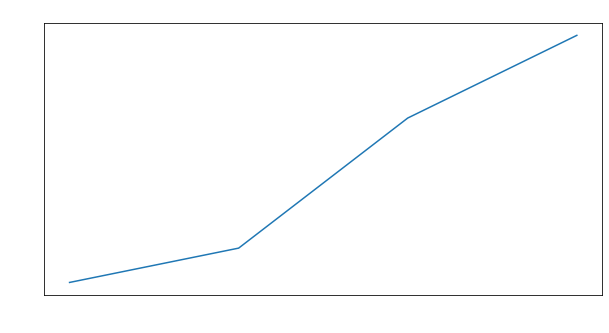

In [7]:
# plot a graph of durations i.e 1GB, 2GB, 3GB, 4GB column for the 16th row
# of type line

ax = df.iloc[18,1:].plot(kind='line', ylabel = 'Duration(ms)', xlabel = 'Ram Size', figsize=(10,5), title='Snapshot Reload time')
# Change the color of x and y axis labels
ax.set_xlabel('Ram Size', color='white')
ax.set_ylabel('Duration(ms)', color='white')

# Change the color of x and y axis tick labels
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white') 

ax.set_title('Snapshot Reload time', color='white')

plt.show()

